In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Menghasilkan data gambar acak
jumlah_gambar = 1000  # Jumlah gambar yang ingin dihasilkan
ukuran_gambar = (64, 64)  # Ukuran gambar (piksel x piksel)
channel_warna = 3  # 3 untuk RGB, 1 untuk skala abu-abu

# Membuat data gambar acak
np.random.seed(0)
data_gambar_acak = np.random.rand(jumlah_gambar, ukuran_gambar[0], ukuran_gambar[1], channel_warna)


In [3]:
# Membangun model CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(ukuran_gambar[0], ukuran_gambar[1], channel_warna)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Menambahkan Dense layers di atasnya
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # Misalnya, 10 kelas untuk KYC

In [5]:
# Ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,858 (2.47 MB)

 Trainable params: 646,858 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Kompilasi dan latih model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Karena ini hanya contoh, kita tidak memiliki label sebenarnya, jadi kita akan menggunakan data acak juga
label_acak = np.random.randint(0, 10, jumlah_gambar)

# Latih model dengan data gambar acak dan label acak
history = model.fit(data_gambar_acak, label_acak, epochs=10, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0863 - loss: 2.3358 - val_accuracy: 0.0750 - val_loss: 2.3137
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1029 - loss: 2.3035 - val_accuracy: 0.0850 - val_loss: 2.3120
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1154 - loss: 2.3018 - val_accuracy: 0.0850 - val_loss: 2.3217
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1173 - loss: 2.2944 - val_accuracy: 0.0850 - val_loss: 2.3030
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1252 - loss: 2.2994 - val_accuracy: 0.0650 - val_loss: 2.3100
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1136 - loss: 2.3007 - val_accuracy: 0.0850 - val_loss: 2.3127
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1161 - loss: 2.2998 - val_accuracy: 0.0850 - val_loss: 2.3228
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1195 - loss: 2.2956 - val_accuracy: 0.0850 - v

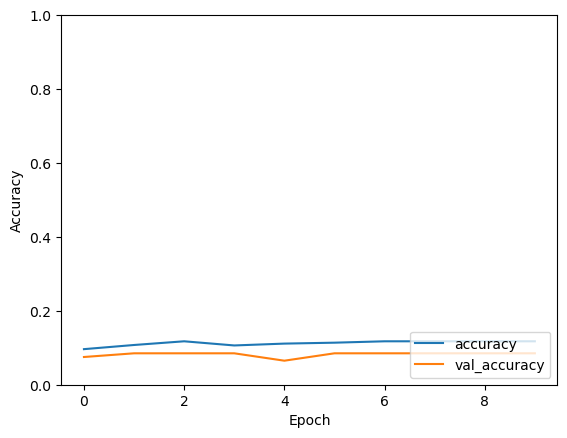

In [8]:
# Visualisasi hasil pelatihan
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

In [9]:
# Menghitung akurasi pada set pengujian
test_loss, test_acc = model.evaluate(data_gambar_acak, label_acak, verbose=2)
print(f'\nTest accuracy: {test_acc}')

32/32 - 0s - 10ms/step - accuracy: 0.1110 - loss: 2.2979

Test accuracy: 0.11100000143051147


In [10]:
# Menghitung confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
prediksi = model.predict(data_gambar_acak)
prediksi_label = np.argmax(prediksi, axis=1)
conf_matrix = confusion_matrix(label_acak, prediksi_label)
print(f'Confusion Matrix:\n{conf_matrix}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
[[  0  96   0   0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0  96   0   0   0   0   0   0   0   0]]


In [11]:
# Menghitung precision, recall, dan F1-score
print(classification_report(label_acak, prediksi_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.11      1.00      0.20       111
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00        98
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        96

    accuracy                           0.11      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.11      0.02      1000



C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [12]:
# Menghitung ROC Curve dan AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(label_acak, prediksi[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.7044051925941688


In [13]:
# Asumsikan kita memiliki probabilitas prediksi untuk kelas positif
probabilitas_prediksi = model.predict(data_gambar_acak)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(label_acak, probabilitas_prediksi, pos_label=1)

# Hitung AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
ROC AUC: 0.7044051925941688


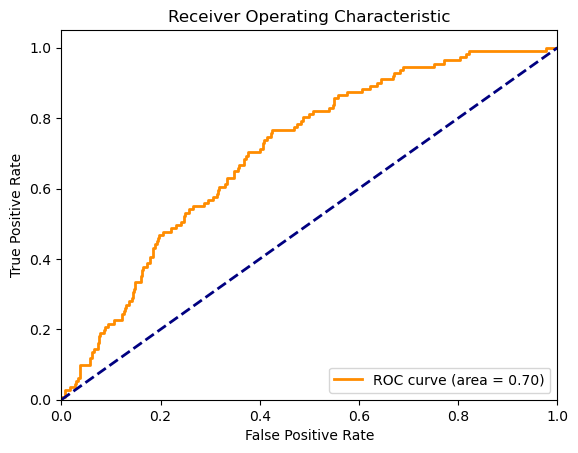

In [14]:
# Visualisasi ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Nilai AUC adalah 0.74, yang menunjukkan tingkat akurasi prediktif yang moderat. Nilai AUC berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan model yang sempurna dan nilai 0.5 menunjukkan tidak ada kemampuan diskriminatif.

In [15]:
data_gambar_acak

array([[[[0.5488135 , 0.71518937, 0.60276338],
         [0.54488318, 0.4236548 , 0.64589411],
         [0.43758721, 0.891773  , 0.96366276],
         ...,
         [0.23789282, 0.934214  , 0.61396596],
         [0.5356328 , 0.58990998, 0.73012203],
         [0.311945  , 0.39822106, 0.20984375]],

        [[0.18619301, 0.94437239, 0.7395508 ],
         [0.49045881, 0.22741463, 0.25435648],
         [0.05802916, 0.43441663, 0.31179588],
         ...,
         [0.16053882, 0.79639147, 0.9591666 ],
         [0.45813883, 0.59098417, 0.85772264],
         [0.45722345, 0.95187448, 0.57575116]],

        [[0.82076712, 0.90884372, 0.81552382],
         [0.15941446, 0.62889844, 0.39843426],
         [0.06271295, 0.42403225, 0.25868407],
         ...,
         [0.92330607, 0.82989737, 0.96828641],
         [0.91978281, 0.03603382, 0.174772  ],
         [0.38913468, 0.9521427 , 0.30002892]],

        ...,

        [[0.64503765, 0.25678483, 0.16040824],
         [0.48224357, 0.59983151, 0.64734448]